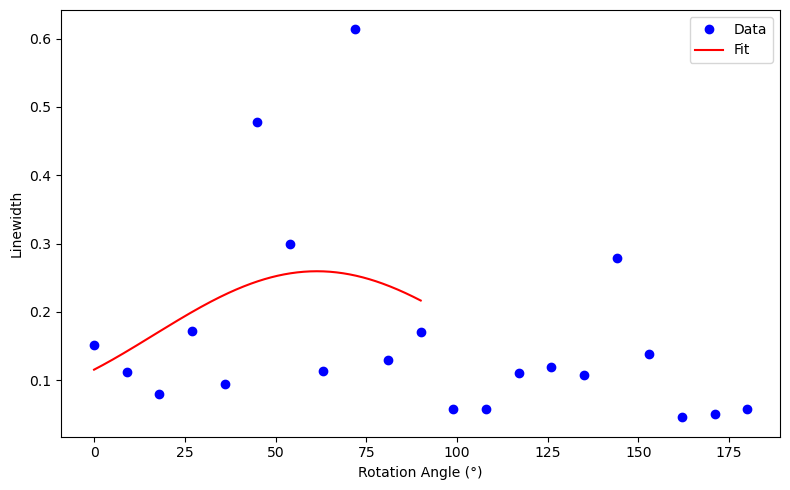

Fit parameters:
F = -0.0623
phi = -0.4993 rad (-28.61°)
G = 0.1973


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Given data
linewidth = np.array([
   0.15148265736441163, 0.11196776068347883, 0.08025419152477217, 0.1721742953134772, 0.09506309592631959,
    0.4774076184813006, 0.3000099981728595, 0.11369374330672369, 0.6134040899217106, 0.1291214259733397, 0.1712282908395799, 
    0.05800540605520429, 0.05771660581710069, 0.11112107963817741, 0.11895397883498245, 0.10716200347507787, 0.27829790988143327, 
    0.13860877734370355, 0.045902250441261325, 0.05020990126003236, 0.05780085549552095
])
angles_deg = np.array([0,9,18,27,36,45,54,63,72,81,90,99,108,117,126,135,144,153,162,171,180])
angles_rad = np.deg2rad(angles_deg)

# Model function
def model(theta, F, phi, G):
    return F * (3 * np.cos(theta - phi)**2 - 1) + G

# Initial guesses for F, phi, G
initial_guess = [0.2, 0.0, 0.2]  # F, phi (radians), G

# Fit the data
params, covariance = curve_fit(model, angles_rad, linewidth, p0=initial_guess)
F_fit, phi_fit, G_fit = params
phi_fit_deg = np.rad2deg(phi_fit)

# Generate fit line
theta_fit = np.linspace(0, np.pi/2, 300)
linewidth_fit = model(theta_fit, *params)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(angles_deg, linewidth, 'o', label='Data', color='blue')
plt.plot(np.rad2deg(theta_fit), linewidth_fit, '-', label='Fit', color='red')
plt.xlabel('Rotation Angle (°)')
plt.ylabel('Linewidth')
#plt.title('Linewidth vs. Rotation Angle\nFit: $H_{res}(\\theta) = F[3\\cos^2(\\theta - \\phi) - 1] + G$')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

# Print fit parameters
print(f"Fit parameters:")
print(f"F = {F_fit:.4f}")
print(f"phi = {phi_fit:.4f} rad ({phi_fit_deg:.2f}°)")
print(f"G = {G_fit:.4f}")
